##Enunciado
Un orfebre fabrica dos tipos de joyas. Las del tipo A precisan 1 gr de oro y 1,5 gr de plata, vendiéndose a 40 euros cada una. Para la fabricación de las de tipo B emplea 1,5 gr de oro y 1 gr de plata, y las vende a 50 euros. El orfebre tiene solo en el taller 750 gr de cada uno de los metales.
¿Cuántas joyas ha de fabricar de cada clase para obtener un beneficio máximo?


##Información que tenemos
Hay dos tipos de joyas:

Tipo A: Usa 1 gr de oro y 1.5 gr de plata

Se vende a 40 €

Tipo B: Usa 1.5 gr de oro y 1 gr de plata

Se vende a 50 €

El orfebre solo dispone de 750 gramos de oro y 750 gramos de plata.

##Limites y Funcion
Función objetivo (lo que queremos maximizar):
→ Ganancia total: 40x + 50y

Restricciones:

Oro: 1x + 1.5y ≤ 750

Plata: 1.5x + 1y ≤ 750

No negatividad: x ≥ 0, y ≥ 0

In [ ]:
# Paso 1: Instalar PuLP (solo necesario si aún no está instalado)
!pip install pulp

# Paso 2: Importar la librería
import pulp

# Paso 3: Crear el problema de maximización
problema = pulp.LpProblem("Problema_Joyas", pulp.LpMaximize)

# Paso 4: Definir las variables de decisión
x = pulp.LpVariable('Joyas_Tipo_A', lowBound=0, cat='Integer')  # cantidad de joyas tipo A
y = pulp.LpVariable('Joyas_Tipo_B', lowBound=0, cat='Integer')  # cantidad de joyas tipo B

# Paso 5: Definir la función objetivo (beneficio a maximizar)
problema += 40 * x + 50 * y, "Beneficio_Total"

# Paso 6: Agregar las restricciones
problema += 1 * x + 1.5 * y <= 750, "Restriccion_Oro"
problema += 1.5 * x + 1 * y <= 750, "Restriccion_Plata"

# Paso 7: Resolver el problema
problema.solve()

# Paso 8: Mostrar resultados
if pulp.LpStatus[problema.status] == "Optimal":
    print("✅ Solución óptima encontrada:")
    print(f"💎 Joyas tipo A a fabricar: {x.varValue}")
    print(f"💍 Joyas tipo B a fabricar: {y.varValue}")
    print(f"💰 Beneficio total: €{pulp.value(problema.objective):.2f}")
else:
    print("❌ No se encontró una solución óptima.")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 114.3 MB/s eta 0:00:00
✅ Solución óptima encontrada:
💎 Joyas tipo A a fabricar: 300.0
💍 Joyas tipo B a fabricar: 300.0
💰 Beneficio total: €27000.00


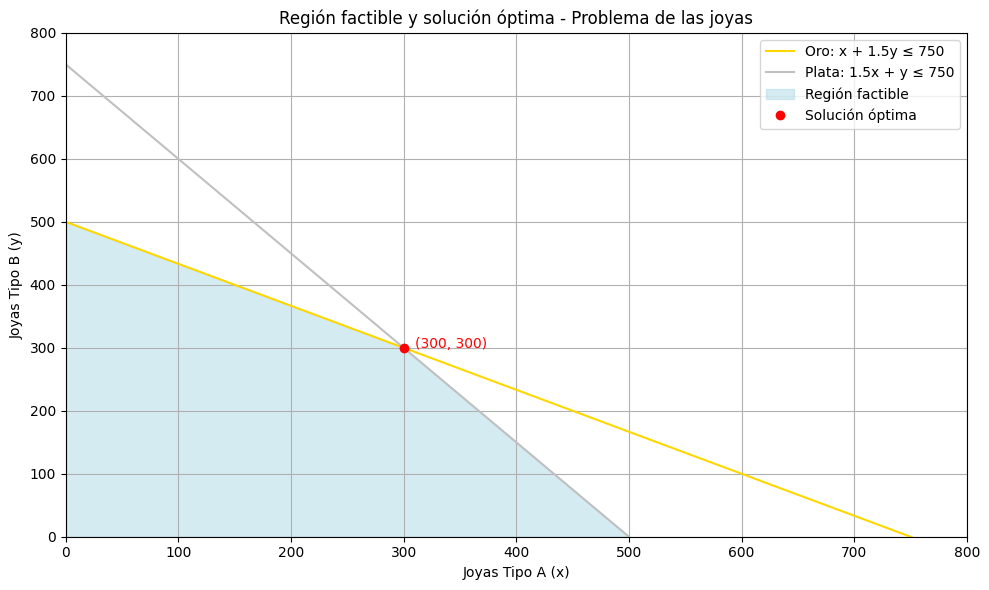

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Crear un rango de valores para x
x_vals = np.linspace(0, 800, 400)

# Restricciones
# 1x + 1.5y <= 750 → y <= (750 - x)/1.5
y_oro = (750 - x_vals) / 1.5

# 1.5x + 1y <= 750 → y <= 750 - 1.5x
y_plata = 750 - 1.5 * x_vals

# Crear la figura
plt.figure(figsize=(10, 6))

# Dibujar las restricciones
plt.plot(x_vals, y_oro, label="Oro: x + 1.5y ≤ 750", color="gold")
plt.plot(x_vals, y_plata, label="Plata: 1.5x + y ≤ 750", color="silver")

# Rellenar la región factible
y_min = np.minimum(y_oro, y_plata)
y_min = np.where((y_oro >= 0) & (y_plata >= 0), y_min, np.nan)
plt.fill_between(x_vals, 0, y_min, where=(y_min >= 0), color='lightblue', alpha=0.5, label="Región factible")

# Punto de solución óptima (obtenido del modelo con PuLP)
x_opt = 300
y_opt = 300

# Marcar la solución óptima
plt.plot(x_opt, y_opt, 'ro', label="Solución óptima")
plt.text(x_opt + 10, y_opt, f"({x_opt}, {y_opt})", fontsize=10, color='red')

# Configuración del gráfico
plt.xlim(0, 800)
plt.ylim(0, 800)
plt.xlabel("Joyas Tipo A (x)")
plt.ylabel("Joyas Tipo B (y)")
plt.title("Región factible y solución óptima - Problema de las joyas")
plt.legend()
plt.grid(True)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


Mejoras, como no sobra material es dificil pensar mejoras, podrian ser aumentar el stock o rediseñar las joyas para que usen menos recursos pero es dificl de plantear
